# graphing

In [12]:
import pandas as pd 
import matplotlib.pylab as plt
#from pywaffle import Waffle
import numpy as np

submitters = pd.read_csv("Clinvar_submitters.csv", skiprows=1,  names=["Submitter", "Maximum_review_status",
                                                          "Total_submissions", "Submissions_with_interpretations", 
                                                         "Total_Genes", "Last_updated", "submitters_id", "country_name",  "alpha_3", "continent"])

## Waffle plot 
### Prepare data

In [8]:
np_snp_per_continent = submitters.groupby('continent').Total_submissions.agg(['sum']) 
np_snp_per_continent

,sum
continent,
Africa,1152
Asia,13910
Europe,81531
North America,1178777
Oceania,10268
South America,21996


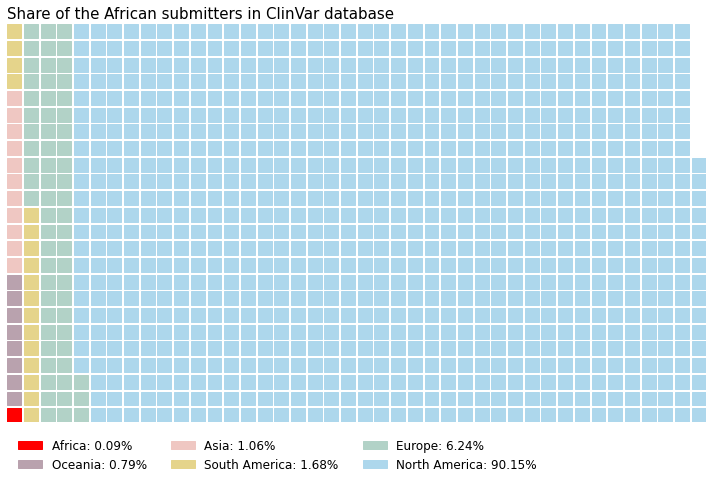

In [21]:
for_waffle_continent = {}
for index, nb_snp in zip(np_snp_per_continent.index, np_snp_per_continent["sum"]): 
    for_waffle_continent[index] =  (nb_snp/np.sum( np_snp_per_continent["sum"])) *1000
for_waffle_continent = {k: v for k, v in sorted(for_waffle_continent.items(), key=lambda item: item[1])}

labels=[]
for item in for_waffle_continent: 
    share = np.round(for_waffle_continent[item]/10, 2)
    labels.append("{0}: {1}%".format(item, share) )

plt.rcParams["figure.figsize"] = (10,7)
fig = plt.figure(
    FigureClass=Waffle,  
    rows=24, 
    colors=("red", "#b9a2ae", '#efc7c2',  '#e5d48b', '#b2d2c7', "#ADD7EC"),
    values=for_waffle_continent, 
     title={
        'label': 'Share of the African submitters in ClinVar database',
        'loc': 'left',
        'fontdict': {'fontsize': 15} },
    labels=labels,
    
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.15),
        'ncol': 3,
        'framealpha': 0,
        'fontsize': 12
    } 
)
plt.savefig("WP_continents.png", dpi=400)

In [13]:
#np_snp_per_continent = submitters.groupby('continent').Total_submissions.agg(['sum']) 
Africa_snp = submitters[submitters.continent == "Africa"]
np_snp_per_country = Africa_snp.groupby('country_name').Total_submissions.agg(['sum']) 
np_snp_per_country

,sum
country_name,
Egypt,128
Morocco,993
Senegal,1
South Africa,10
Sudan,4
Tunisia,16


In [24]:
np_genes_per_country = Africa_snp.groupby('country_name').Total_Genes.agg(['sum']) 
np_genes_per_country

,sum
country_name,
Egypt,31.0
Morocco,28.0
Senegal,1.0
South Africa,8.0
Sudan,5.0
Tunisia,13.0


In [44]:
submitters.Total_submissions.sum()

1307634

In [52]:
Africa_snp.groupby('country_name').alpha_3.agg('count')

country_name
Egypt           8
Morocco         7
Senegal         1
South Africa    5
Sudan           1
Tunisia         4
Name: alpha_3, dtype: int64

In [25]:
Africa_snp.Total_submissions.sum()

1152

In [29]:
Oceania_snp = submitters[submitters.continent == "Oceania"]
Oceania_snp.Total_submissions.sum()

10268

# Diseases and phenotypes

In [35]:
genes = pd.read_csv("clinVar_genes_byAfricans.csv")
genes

,Gene,Submissions,Last Updated,submitters_id
0,HOXB13,762,"Sep 10, 2019",507187
1,SPOP,160,"Oct 7, 2019",507187
2,ARSA,10,"Nov 18, 2019",505907
3,ARSB,8,"Oct 25, 2017",505907
4,FKBP10,13,"Apr 2, 2019",505907
...,...,...,...,...
79,WAS,1,"May 4, 2020",507559
80,MPV17,1,"Jun 17, 2016",505808
81,CYP11B1,1,"Apr 28, 2020",507451
82,LOC106799833,1,"Apr 28, 2020",507451


In [39]:
genes.groupby('Gene').count()

,Submissions,Last Updated,submitters_id
Gene,,,
ALK,1,1,1
ALX4,1,1,1
ARG1,1,1,1
ARSA,1,1,1
ARSB,1,1,1
...,...,...,...
VPS13A,1,1,1
WAS,1,1,1
WDR73,1,1,1


In [10]:

phenotypes.groupby('Name').count().shape

(54, 3)

In [15]:
Africa_snp.to_csv("African_submitters.csv", index=False)

In [18]:
genes_africa = pd.read_csv("clinVar_genes_byAfricans.csv")
phenotypes  = pd.read_csv("clinVar_phenotypes_byAfricans.csv")
gene_Ids = pd.read_csv("gene_ids.csv")

In [31]:
new_table = pd.merge(left = genes_africa, right= gene_Ids, on="Gene", how = "left" )

In [38]:
S2 = pd.merge(left = new_table, right= phenotypes, on=["submitters_id", "Submissions", "Last Updated"], how = "left" ).drop_duplicates()

In [39]:
S2.to_csv("genes_phenotypes_by_subitter_id.csv", index=False)

In [47]:

p1 = ['SA45T', 'SA45I', 'SA45D', 'SA45N', 'SA45A', 'SA45Q','SA45E','SA45R']
p2 = ['GA46A','GA46R', 'GA46Q', 'GA46S','GA46F', 'GA46T', 'GA46K', 'GA46D', 'GA46E']
p3 = ['KA109R', 'KA109S', 'KA109T','KA109A','KA109D', 'KA109I', 'KA109G', 'KA109N']
p4 = ['SA498L','SA498N', 'SA498A']
p5 = ['KA213T']
p6 = ['KA231N','KA231S', 'KA231E', 'KA231R', 'KA231Q']



In [45]:
import itertools as it
it.combinations(iterable, p1)

NameError: name 'iterable' is not defined

In [50]:
for i in it.product([tuple(p5)], it.permutations(p4)):
    print(i)

In [52]:
def funnyperms(first, *rest):
    for i in it.product([first], *(it.permutations(j) for j in rest)):
        yield tuple(zip(*i))

for i in funnyperms(p1, p2):
    print(i)

In [53]:
funnyperms(p1, p2)

<generator object funnyperms at 0x7f8b31f89150>